In [41]:
from keras.datasets import fashion_mnist

(xtrain, ytrain), (xtest, ytest) = fashion_mnist.load_data()

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit, logit

In [43]:
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
import tensorflow.keras as tf
from sklearn.preprocessing import LabelBinarizer
from keras.optimizers import Adam

In [44]:
#counting unique classes provided in the label

classes = pd.Series.value_counts(ytrain)
print(classes)

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64


In [118]:
ref_labels = {
    '0' : 'T-shirt/top',
    '1': 'Trouser',
    '2': "Pullover",
    '3': "Dress",
    '4': "Coat",
    '5': "Sandal",
    '6': "Shirt",
    '7': "Sneaker",
    '8': "Bag",
    '9': "Ankle boot"
}

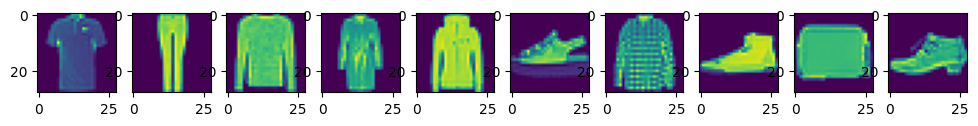

In [45]:
labels = [0,1,2,3,4,5,6,7,8,9]
plt.figure(figsize = (12,8))

def plot_sample(index, i):
  plt.subplot(1, 10, i+1)
  plt.imshow(xtrain[index].reshape((28, 28)))

for l in labels:
  idx = []
  random_index = []
  for i in range(len(ytrain)):
    if ytrain[i] == l:
      idx.append(i)
  random_index = np.random.choice(idx, 1)
  plot_sample(random_index, l)

plt.show()

 **Question 2**

In [128]:
#to calculate the probability distribution for any random sample image from the training dataset

def sigmoid(x):
  return 1/(1+ np.exp(-x))

def softmax(x):
  exp_x = np.exp(x)
  sum = np.sum(exp_x)

  softmax_x = exp_x/sum
  return softmax_x

def prob_dist(input, size_of_hidden_layers, number_of_hidden_layers, output_size = 10):
  for i in range(number_of_hidden_layers):
    w_initial = np.random.randn(input.shape[1], size_of_hidden_layers)
    #print(w_initial)

    b_initial = np.random.randn(1, size_of_hidden_layers)
    #print(b_initial)
    #print(i, input.shape, w_initial.shape, b_initial.shape)
    pre_activation_i = np.matmul(input, w_initial) + b_initial
    #print(pre_activation_i)

    output_layer_i = sigmoid(pre_activation_i)
    #return output_layer_i
    #print(i, output_layer_i.shape)
    input = output_layer_i

  w_output = np.random.randn(output_size, size_of_hidden_layers)
  b_output = np.random.rand(1, output_size)

  #print(i+1, w_output.shape, b_output.shape)

  pre_activation = np.matmul(input, w_output.T) + b_output
  print(pre_activation.shape)
  final_output = softmax(pre_activation)

  return final_output

In [135]:
#pick a random image and calculate probability over teh classes
random_index = np.random.choice(xtrain.shape[0], 1)
print(random_index)
img = xtrain[random_index].reshape(-1,28*28*1)

prob = prob_dist(img, 200, 2)

[20991]
(1, 10)


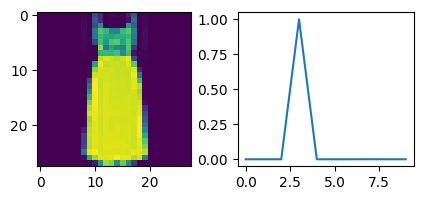

In [136]:
#plot the random image and its probability distribution
plt.figure(figsize=(5, 2))

plt.subplot(1, 2, 1)
plt.imshow(img.reshape((28, 28)))

plt.subplot(1, 2, 2)
plt.plot(labels, prob[0,:])
plt.show()

In [137]:
max_prob = np.argmax(prob)
print("Class having maximum probability is :", max_prob, " with", prob[0][max_prob])
print("Corresponding category for this label is: ", ref_labels[str(max_prob)])


Class having maximum probability is : 3  with 0.9995409339945998
Corresponding category for this label is:  Dress


**Question 3**

In [90]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def softmax(x):
  exp_x = np.exp(x)
  sum = np.sum(exp_x)

  softmax_x = exp_x/sum
  return softmax_x

def forward_prop(input, size_of_hidden_layers, number_of_hidden_layers, output_size):
  for i in range(number_of_hidden_layers):
    w_initial = np.random.randn(input.shape[1], size_of_hidden_layers)
    #print(w_initial)

    b_initial = np.random.randn(1, size_of_hidden_layers)
    #print(b_initial)
    #print(i, input.shape, w_initial.shape, b_initial.shape)
    pre_activation_i = np.matmul(input, w_initial) + b_initial
    #print(pre_activation_i)

    output_layer_i = sigmoid(pre_activation_i)
    #return output_layer_i
    #print(i, output_layer_i.shape)
    input = output_layer_i

  w_output = np.random.randn(output_size, size_of_hidden_layers)
  b_output = np.random.rand(1, output_size)

  #print(i+1, w_output.shape, b_output.shape)

  pre_activation = np.matmul(input, w_output.T) + b_output
  print(pre_activation.shape)
  final_output = softmax(pre_activation)

  return final_output

def backward_prop(predicted_output, output)

'def do_forward_prop(input, no_of_hidden_layer, size_of_hidden_layers, output_size, input_size):\n  w_initial = np.random.randn(input_size, size_of_hidden_layers)\n  b_initial = np.random.randn(1, size_of_hidden_layers)\n\n  output_weight = np.random.randn(output_size, size_of_hidden_layers)\n  output_bias = np.random.randn(1, output_size)\n\n  for i in range(1, no_of_hidden_layer+1):\n    output_i = calculate(input, w_initial, b_initial)\n    input = output_i\n\n  final_output = calculate(input, output_weight, output_bias)\n  return final_output\n'

In [47]:
xtrain = xtrain.reshape((60000, 28*28*1))
xtrain.shape

(60000, 784)

In [86]:
ytrain = ytrain.reshape((60000, 1))
ytrain.shape

(60000, 1)

In [87]:
xtrain = (xtrain.astype('float32')/255.0)
ytrain = (ytrain.astype('float32')/255.0)

In [91]:
feedforward = calculate(xtrain, 100, 2, 10)
print(feedforward.shape)

(60000, 10)
(60000, 10)


In [ ]:
import numpy as np

class NeuralNetwork:
	def __init__(self, input_size, hidden_size, output_size):
		self.input_size = input_size
		self.hidden_size = hidden_size
		self.output_size = output_size

		# Initialize weights
		self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
		self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)

		# Initialize the biases
		self.bias_hidden = np.zeros((1, self.hidden_size))
		self.bias_output = np.zeros((1, self.output_size))

	def sigmoid(self, x):
		return 1 / (1 + np.exp(-x))

	def sigmoid_derivative(self, x):
		return x * (1 - x)

	def feedforward(self, X):
		# Input to hidden
		self.hidden_activation = np.dot(X, self.weights_input_hidden) + self.bias_hidden
		self.hidden_output = self.sigmoid(self.hidden_activation)

		# Hidden to output
		self.output_activation = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
		self.predicted_output = self.sigmoid(self.output_activation)

		return self.predicted_output

	def backward(self, X, y, learning_rate):
		# Compute the output layer error
		output_error = y - self.predicted_output
		output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

		# Compute the hidden layer error
		hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
		hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

		# Update weights and biases
		self.weights_hidden_output += np.dot(self.hidden_output.T, output_delta) * learning_rate
		self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
		self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
		self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

	def train(self, X, y, epochs, learning_rate):
		for epoch in range(epochs):
			output = self.feedforward(X)
			self.backward(X, y, learning_rate)
			if epoch % 4000 == 0:
				loss = np.mean(np.square(y - output))
				print(f"Epoch {epoch}, Loss:{loss}")

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Test the trained model
output = nn.feedforward(X)
print("Predictions after training:")
print(output)
